# Predicción de sobrevivientes del Titanic

* Competition Site
* Description
* Evaluation
* Data Set
* Setup Imports and Variables
* Explore the Data
* Feature: Passenger Classes
* Feature: Sex
* Feature: Embarked
* Feature: Age
* Feature: Family Size
* Final Data Preparation for Machine Learning
* Data Wrangling Summary
* Random Forest: Training
* Random Forest: Predicting
* Random Forest: Prepare for Kaggle Submission
* Support Vector Machine: Training
* Support Vector Machine: Predicting

## Description

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió tras chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocionó a la comunidad internacional y dio lugar a mejores normas de seguridad para los buques.

Una de las razones por las que el naufragio provocó tanta pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

## Evaluación

Los datos históricos se han dividido en dos grupos, un 'conjunto de entrenamiento' y un 'conjunto de prueba'. Para el conjunto de entrenamiento, proporcionamos el resultado para cada pasajero. Utilizará este conjunto para construir su modelo para generar predicciones para el conjunto de prueba.

Para cada pasajero en el conjunto de prueba, debe predecir si sobrevivieron o no al hundimiento (0 para fallecidos, 1 para sobrevivientes). 

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .csv (59.76 kb)   |
| gendermodel      | .csv (3.18 kb)    |
| genderclassmodel | .csv (3.18 kb)    |
| test             | .csv (27.96 kb)   |
| gendermodel      | .py (3.58 kb)     |
| genderclassmodel | .py (5.63 kb)     |
| myfirstforest    | .py (3.99 kb)     |

<pre>
DESCRIPCION DE VARIABLES:
Survived	    Superviviente
                (0 = No; 1 = Yes)
pclass          Clase Pasajero
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Nombre
sex             Género
age             Edad
sibsp           Número de hermanos / cónyuges a bordo
parch           Número de padres/niños a bordo
ticket          Número de Ticket 
fare            Tarifa de pasajero
cabin           Cabina
embarked        Puerto de embarque
                (C = Cherbourg; Q = Queenstown; S = Southampton)

NOTAS:
Pclass es un indicador del estatus socioeconómico (SES)
 1º ~ Superior; 2do ~ Medio; 3° ~ Inferior

La edad está en años; Fraccional si Edad menor a Un (1)
 Si la Edad es Estimada, tiene la forma xx.5

Con respecto a las variables de relación familiar (es decir, sibsp y parch)
algunas relaciones fueron ignoradas. Las siguientes son las definiciones utilizadas
para sibsp y parch.

Hermano: hermano, hermana, hermanastro o hermanastra del pasajero a bordo del Titanic
Cónyuge: Esposo o Esposa del Pasajero a Bordo del Titanic (Amantes y Prometidos Ignorados)
Padre: madre o padre del pasajero a bordo del Titanic
Niño: hijo, hija, hijastro o hijastra del pasajero a bordo del Titanic

Otros parientes de la familia excluidos de este estudio incluyen primos,
sobrinos/sobrinas, tías/tíos y suegros. Algunos niños viajaron
solo con una niñera, por lo tanto, parch=0 para ellos. También, algunos
viajó con amigos muy cercanos o vecinos en un pueblo, sin embargo,
las definiciones no apoyan tales relaciones.
</pre>

## Configurar importaciones y variables


In [ ]:
import pandas as pd
import numpy as np
import pylab as plt

# Establecer el tamaño predeterminado global de las figuras de matplotlib
plt.rc('figure', figsize=(10, 5))

# Tamaño de las figuras de matplotlib que contienen subplots
fizsize_with_subplots = (10, 10)

# Tamaño de los contenedores de histograma de matplotlib
bin_size = 10

## Explorar los Datos

Lee los datos:

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head() #cabecera

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.tail() #Tail/cola

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Ver los tipos de datos de cada columna:

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

El tipo 'objeto' es una cadena para pandas, lo que plantea problemas con los algoritmos de aprendizaje automático. Si queremos usarlos como características, necesitaremos convertirlos en representaciones numéricas.

Obtenga información básica sobre el DataFrame:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


En Age, Cabin, and Embarked hay valores faltantes. A Cabin le faltan demasiados valores, mientras que podríamos inferir valores para Age y Embarked.

Genere varias estadísticas descriptivas en el DataFrame:

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ahora que tenemos una idea general del contenido del conjunto de datos, podemos profundizar en cada columna. Haremos análisis de datos exploratorios y limpiaremos datos para configurar "características" que usaremos en nuestros algoritmos de aprendizaje automático.

Ploteamos algunas características para tener una mejor idea de cada una:

Text(0.5, 1.0, 'Histograma por edad')

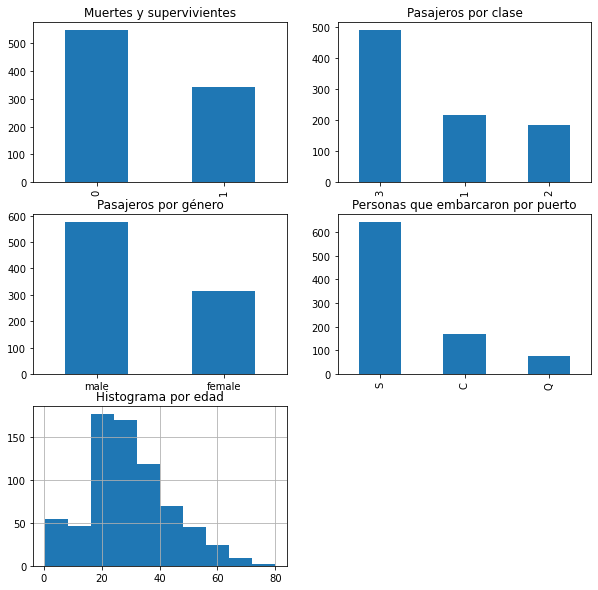

In [215]:
# Configurar un grid de plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot de recuentos de muertes y supervivencia
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', title='Muertes y supervivientes')

# Plot recuento por clase (Pclass)
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', title='Pasajeros por clase')

# Plot recuento por género
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', title='Pasajeros por género')
plt.xticks(rotation=0)

# Plot recuento por embarque
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', title='Personas que embarcaron por puerto')

# Plot histograma por edades
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Histograma por edad')

A continuación, exploraremos varias características para ver su impacto en las tasas de supervivencia.

## Característica: Clases de pasajeros

De nuestro análisis exploratorio de datos en la sección anterior, vemos que hay tres clases de pasajeros: Primera, Segunda y Tercera clase. Determinaremos qué proporción de pasajeros sobrevivieron en función de su clase de pasajeros.

Genere una tabulación cruzada de Pclass y Survived:

In [216]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot de t la tabulación cruzada:

Text(0, 0.5, 'Ratio supervivientes')

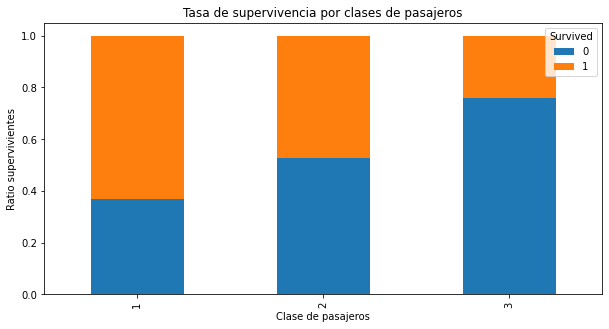

In [217]:
# Normalice la tabulación cruzada para que sume 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Tasa de supervivencia por clases de pasajeros')
plt.xlabel('Clase de pasajeros')
plt.ylabel('Ratio supervivientes')

Podemos ver que la clase de pasajero parece tener un impacto significativo en la supervivencia de un pasajero. Los de Primera Clase tienen la mayor posibilidad de supervivencia.

## Característica: Género

El género también podría haber jugado un papel en la determinación de la tasa de supervivencia de un pasajero. Tendremos que asignar Sexo de una cadena a un número para prepararlo para los algoritmos de aprendizaje automático.

Genere un mapeo de Sex desde una cadena a una representación numérica:

In [218]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Transforme Género (Sex) de una cadena a una representación numérica:

In [219]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Trace una tabulación cruzada normalizada para Sex_Val y Survived:

<AxesSubplot:title={'center':'Ratio supervivencia por Género'}, xlabel='Sex_Val'>

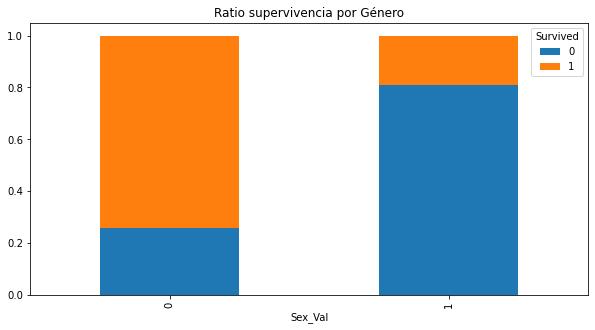

In [220]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Ratio supervivencia por Género')

La mayoría de las mujeres sobrevivieron, mientras que la mayoría de los hombres no.

A continuación, determinaremos si podemos obtener información sobre la tasa de supervivencia al observar tanto Sex como Pclass.

Contamos los hombres y mujeres en cada Pclass (clase del pasajero):

In [221]:
# Obtener los valores únicos dePclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print ('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print ('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Plot de ratio de supervivencia por Género y Pclass (clase)

Text(0, 0.5, 'Survival Rate')

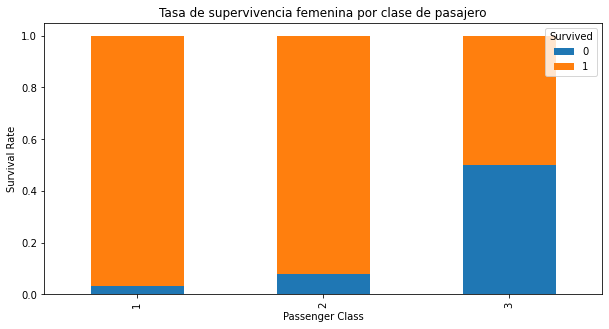

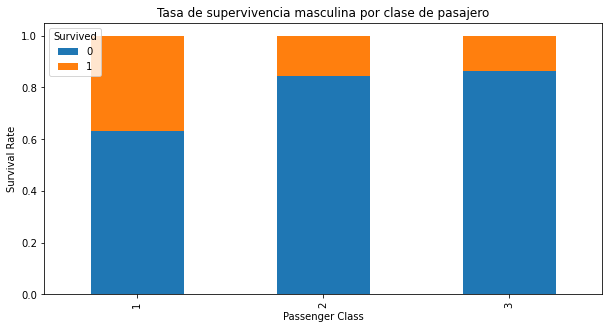

In [222]:
# Plot tasa de supervivencia por sexo
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Tasa de supervivencia femenina por clase de pasajero')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot tasa de supervivencia por Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Tasa de supervivencia masculina por clase de pasajero')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

La gran mayoría de las mujeres de Primera y Segunda clase sobrevivieron. Los hombres de primera clase tenían la mayor probabilidad de supervivencia.

## Característica: Embarcado


La columna Embarcados puede ser una característica importante, pero le faltan un par de puntos de datos que podrían plantear un problema para los algoritmos de aprendizaje automático:

In [229]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val


Dado que la gran mayoría de los pasajeros embarcaron en 'S': 0, asignamos los valores faltantes en Embarcados a 'S':

In [224]:
#if len(df_train[df_train['Embarked'].isnull()]) > 0:
len(df_train[df_train['Embarked'].isnull()])

2

In [225]:
df_train['Embarked'].fillna('S', inplace=True)
len(df_train[df_train['Embarked'].isnull()])

0

Prepárese para mapear Embarcado de una cadena a una representación numérica:

In [226]:
# ObObtenga los valores únicos de Embarkedtenga los valores únicos de Embarked
#embarked_locs = sorted(df_train['Embarked'].unique())
embarked_locs = df_train['Embarked'].unique()

In [227]:
embarked_locs

array(['S', 'C', 'Q'], dtype=object)

In [230]:
embarked_locs_mapping = dict(zip(embarked_locs,range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'S': 0, 'C': 1, 'Q': 2}

Transforme Embarked de una cadena a una representación numérica para prepararlo para los algoritmos de aprendizaje automático:

In [231]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


Plot del histograma para el valor de embarque (Embarked_Val):

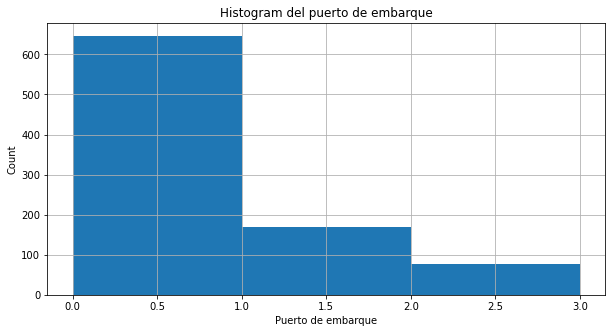

In [232]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Histogram del puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Count')
plt.show()

Verifique que no tengamos más NaN para Embarked_Val:

In [233]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Trace una tabulación cruzada normalizada para Embarked_Val y Survived:


Text(0, 0.5, 'Ratio superviviente')

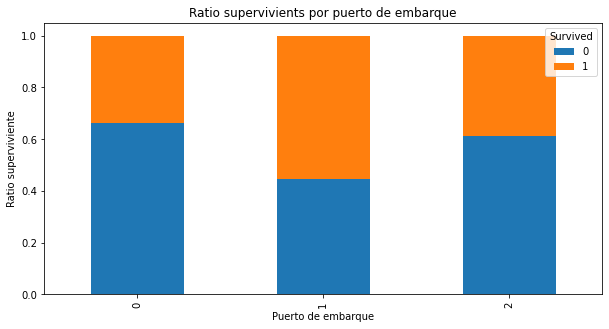

In [236]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Ratio supervivients por puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Ratio superviviente')

Parece que los que se embarcaron en la ubicación 'C': 1 tuvieron la mayor tasa de supervivencia. Profundizaremos un poco más para ver por qué este podría ser el caso. A continuación, trazamos un gráfico para determinar la composición de género y clase de pasajero para cada puerto:

## Característoca. Edad

La columna Edad parece una característica importante; desafortunadamente, le faltan muchos valores. Tendremos que completar los valores faltantes como hicimos con Embarked.

Filtrar para ver los valores de edad que faltan:

In [238]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine la Edad típica para cada clase de pasajero por Sex_Val. Usaremos la mediana en lugar de la media porque el histograma de edad parece estar sesgado hacia la derecha.

In [239]:
# Para mantener la edad intacta, haga una copia llamada AgeFill
# que usaremos para completar las edades que faltan:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Asegúrese de que AgeFill no contenga valores faltantes:

In [240]:
len(df_train[df_train['AgeFill'].isnull()])

0

Trace una tabulación cruzada normalizada para AgeFill y Survived:

Text(0, 0.5, 'Age')

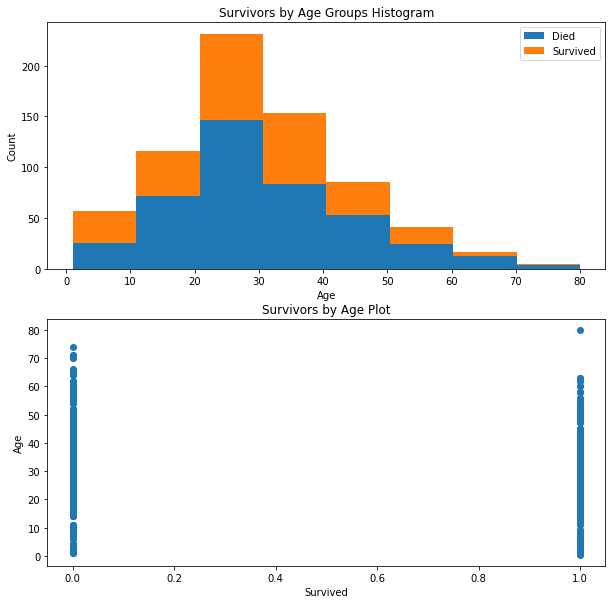

In [246]:
# grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histograma de AgeFill segmentado por Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot dispersión Survived y AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

Desafortunadamente, los gráficos anteriores no parecen mostrar claramente ninguna información. Seguiremos investigando más.


Trazar la densidad de AgeFill por Pclass:


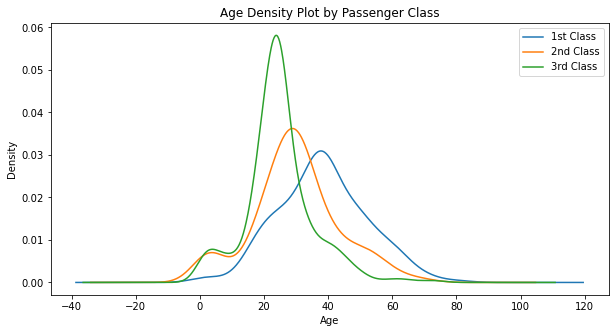

In [247]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

Al observar la densidad de AgeFill por Pclass, vemos que los pasajeros de primera clase eran generalmente mayores que los pasajeros de segunda clase, que a su vez eran mayores que los pasajeros de tercera clase. Hemos determinado que los pasajeros de primera clase tenían una tasa de supervivencia más alta que los pasajeros de segunda clase, que a su vez tenían una tasa de supervivencia más alta que los pasajeros de tercera clase.


<AxesSubplot:>

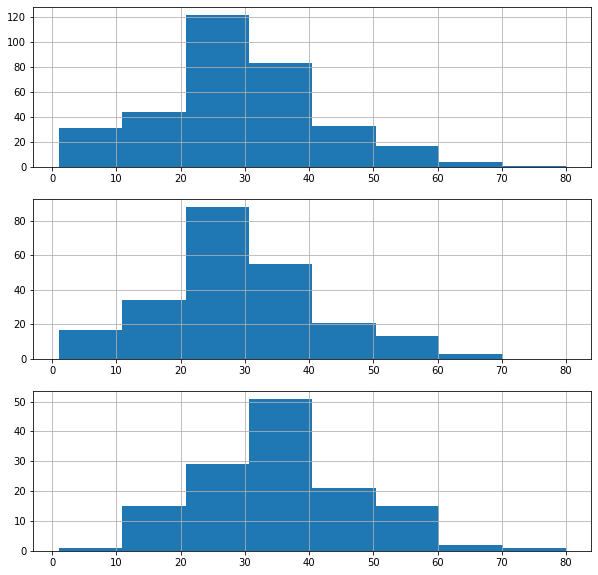

In [249]:
# grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot el histograma AgeFill para sobrevivientes
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

En el primer gráfico, vemos que la mayoría de los sobrevivientes provienen de los rangos de edad de 20 a 30 años y podría explicarse mediante los siguientes dos gráficos. El segundo gráfico muestra que la mayoría de las mujeres están dentro de los 20 años. El tercer gráfico muestra que la mayoría de los pasajeros de primera clase están dentro de los 30 años.


## Característica: tamaño familia

La ingeniería de funciones implica la creación de nuevas funciones o la modificación de funciones existentes que podrían ser ventajosas para un algoritmo de aprendizaje automático.

Defina una nueva característica FamilySize que sea la suma de Parch (número de padres o hijos a bordo) y SibSp (número de hermanos o cónyuges):

In [250]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,35.0,0


Plot un histograma de familySize:

Text(0.5, 1.0, 'Family Size Histogram')

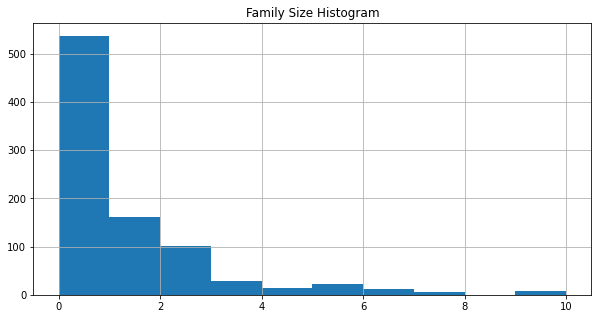

In [251]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot un histograma de AgeFill segmentado por Survived:

Text(0.5, 1.0, 'Survivors by Family Size')

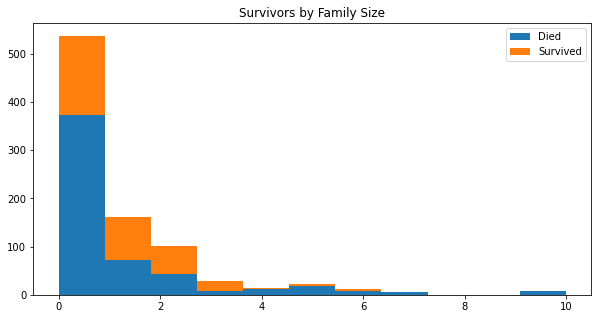

In [252]:
# Obtenga los valores únicos de Embarked y su máximo
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Según los histogramas, no es inmediatamente obvio qué impacto tiene FamilySize en la supervivencia. Los algoritmos de aprendizaje automático podrían beneficiarse de esta característica.

Las características adicionales que podríamos querer diseñar podrían estar relacionadas con la columna Nombre, por ejemplo, los títulos honorarios o peatonales podrían brindar pistas y un mejor poder predictivo para la supervivencia de un hombre.

## Preparación de datos finales para el aprendizaje automático

Muchos algoritmos de aprendizaje automático no funcionan en cadenas y, por lo general, requieren que los datos estén en una matriz, no en un DataFrame.

Mostrar solo las columnas de tipo 'objeto' (cadenas):

In [253]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Borrar las columnas que no usaremos:

In [254]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Suelta las siguientes columnas:

* La columna Edad ya que usaremos la columna AgeFill en su lugar.
* Las columnas SibSp y Parch ya que usaremos FamilySize en su lugar.
* La columna PassengerId ya que no se usará como una función.
* El Embarked_Val ya que decidimos usar variables ficticias en su lugar.

In [255]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived        int64
Pclass          int64
Fare          float64
Sex_Val         int32
AgeFill       float64
FamilySize      int64
dtype: object

Convierta el DataFrame en una matriz numpy:


In [256]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  ,  1.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 ,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  ,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    ,  1.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  ,  1.    , 32.    ,  0.    ]])

## Resumen de datos

A continuación se muestra un resumen de datos que realizamos en nuestro conjunto de datos de entrenamiento. Encapsulamos esto en una función, ya que necesitaremos hacer las mismas operaciones en nuestro conjunto de prueba más adelante.

In [308]:
def clean_data(df, drop_passenger_id):
    
    # Obtenga los valores únicos del sexo
    sexes = df['Sex'].unique()
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Get the unique values of Embarked
    embarked_locs = df['Embarked'].unique()

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
#     # Transform Embarked from a string to dummy variables
#     #df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()]) > 0:
        df['Embarked'].fillna('S', inplace=True)

    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()]) > 0:
        avg_fare = df['Fare'].mean()
        df['Fare'].fillna(int(avg_fare), inplace=True)

    
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

## Random Forest: Entrenamiento

Crea el objeto de bosque aleatorio:


In [309]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

Ajuste los datos de entrenamiento y cree los árboles de decisión:

In [310]:
# Funciones de datos de entrenamiento, omita la primera columna  'Survived'
train_features = train_data[:, 1:]

# Valores de la columna 'Survived'

train_target = train_data[:, 0]

# Ajustar el modelo a nuestros datos de entrenamiento
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Precisión media de Random Forest: {0}".format(score)

'Precisión media de Random Forest: 0.9797979797979798'

Read the test data:

In [311]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Note the test data does not contain the column 'Survived', we'll use our trained model to predict these values.

In [312]:
# Los datos disputan el conjunto de prueba y lo convierten en una matriz numpy
df_test = clean_data(df_test, drop_passenger_id=False)
test_data = df_test.values

Take the decision trees and run it on the test data:

In [314]:
# Obtenga las funciones de datos de prueba, omitiendo la primera columna 'PassengerId'

test_x = test_data[:, 1:]

# Prediga los valores de supervivencia para los datos de prueba

test_y = clf.predict(test_x)

## Random Forest: 

Cree un DataFrame combinando el índice de los datos de prueba con la salida de las predicciones, luego escriba los resultados en la salida:


In [315]:
df_test['Survived'] = test_y
df_test[['PassengerId', 'Survived']] \
    .to_csv('results-rf.csv', index=False)

## Evaluar la precisión del modelo


Dividiremos nuestros datos de entrenamiento, el 80 % irá a "entrenar" y el 20 % irá a "probar":

In [318]:
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
#pip install -U scikit-learn
from sklearn.model_selection import train_test_split


# Dividir 80-20 entrenamiento vs datos de prueba

train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 5) (891,)
(712, 5) (712,)
(179, 5) (179,)


Utilice los nuevos datos de entrenamiento para ajustar el modelo, predecir y obtener la puntuación de precisión:


In [319]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.84


Ver la matriz de confusión:


|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

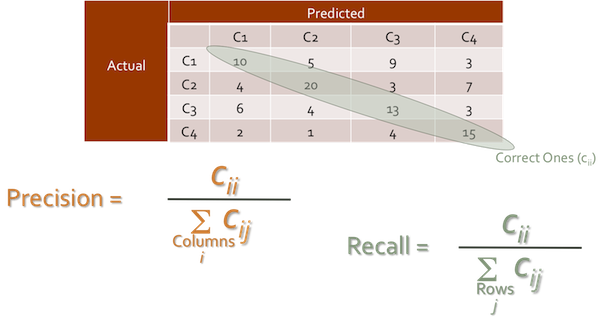

In [322]:
from IPython.core.display import Image 
Image(filename='confusion_matrix.png', width=800)

Obtenga la puntuación del modelo y la matriz de confusión:


In [324]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.84 

Confusion Matrix  [[102   8]
 [ 20  49]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 102 |   8 |
Actual   |-----|-----|
       1 |  20 |  49 |
         |-----|-----|


Mostrar el informe de clasificación:


$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [325]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.93      0.88       110
    Survived       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179

